# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

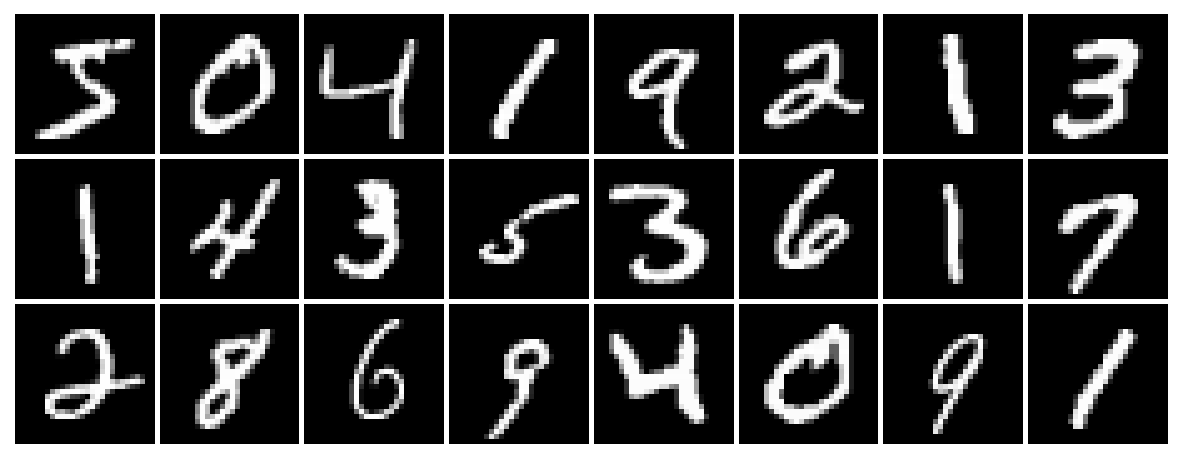

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


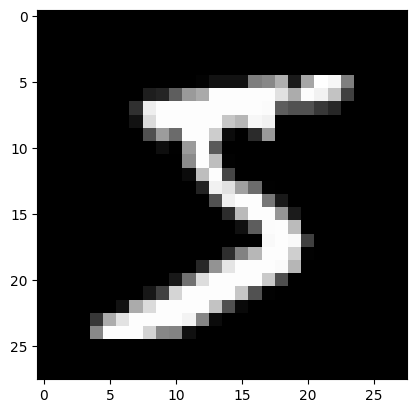

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.2004, -0.1053, -0.1840,  0.1737, -0.4256,  0.2493,  0.0576,  0.0004,
         -0.0777, -0.0113],
        [ 0.1549, -0.2961, -0.1210, -0.1226, -0.3576,  0.2522,  0.3721,  0.1030,
         -0.0155, -0.1462],
        [-0.0426, -0.2576, -0.2453, -0.0627, -0.0167,  0.3056, -0.1097, -0.1913,
          0.1749, -0.0349],
        [-0.0894, -0.0235, -0.0046,  0.1915,  0.1673, -0.1659, -0.0109, -0.1096,
         -0.1239,  0.0058],
        [ 0.1718,  0.0704, -0.1765, -0.1250,  0.0406, -0.0834,  0.2998, -0.2503,
         -0.1713,  0.1562]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-xiwk7yob
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-xiwk7yob
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2954, grad_fn=<NllLossBackward0>)

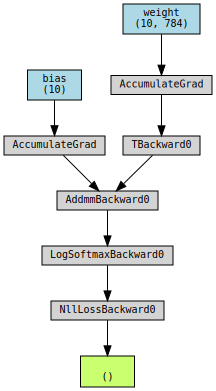

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [15]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [16]:
print('Final loss:', loss.item())

Final loss: 0.2658343017101288


### Visualizando gráfico de perda durante o treinamento

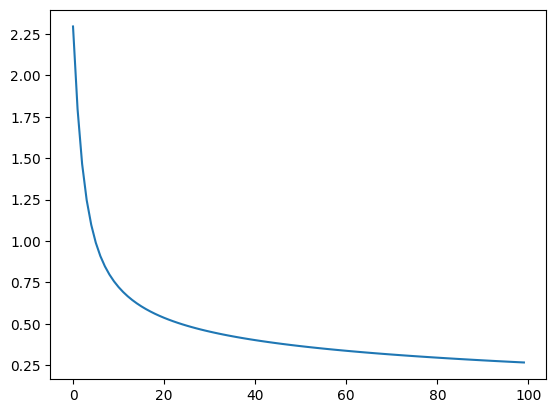

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.943


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,2,1,0
2,0,1,91,1,0,1,1,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


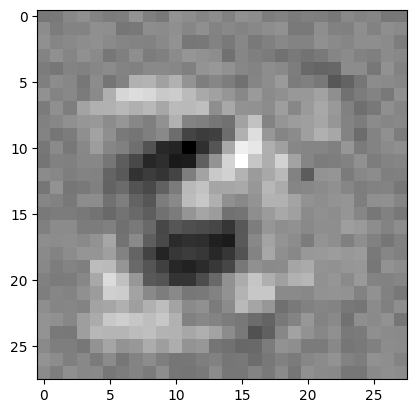

In [20]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

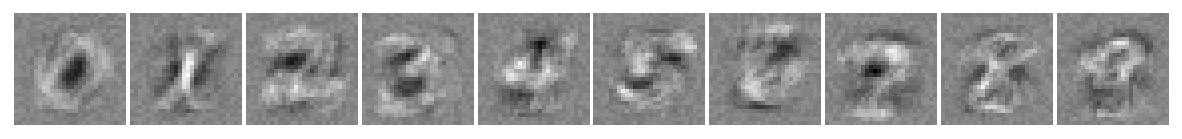

In [21]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [27]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época: ',i,'/',epochs,' -- Loss:',loss.item(),' -- Acurácia:',accuracy)

Época:  0 / 100  -- Loss: 0.1066168025135994  -- Acurácia: 0.991
Época:  1 / 100  -- Loss: 0.1063925251364708  -- Acurácia: 0.991
Época:  2 / 100  -- Loss: 0.10616911202669144  -- Acurácia: 0.991
Época:  3 / 100  -- Loss: 0.10594652593135834  -- Acurácia: 0.991
Época:  4 / 100  -- Loss: 0.10572478175163269  -- Acurácia: 0.991
Época:  5 / 100  -- Loss: 0.10550390928983688  -- Acurácia: 0.991
Época:  6 / 100  -- Loss: 0.10528381913900375  -- Acurácia: 0.992
Época:  7 / 100  -- Loss: 0.10506459325551987  -- Acurácia: 0.992
Época:  8 / 100  -- Loss: 0.10484617948532104  -- Acurácia: 0.992
Época:  9 / 100  -- Loss: 0.1046285554766655  -- Acurácia: 0.992
Época:  10 / 100  -- Loss: 0.104411780834198  -- Acurácia: 0.992
Época:  11 / 100  -- Loss: 0.10419578850269318  -- Acurácia: 0.992
Época:  12 / 100  -- Loss: 0.10398060828447342  -- Acurácia: 0.992
Época:  13 / 100  -- Loss: 0.10376622527837753  -- Acurácia: 0.992
Época:  14 / 100  -- Loss: 0.10355264693498611  -- Acurácia: 0.992
Época:  15

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época:  0 / 100  -- Loss: 0.0742454007267952  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


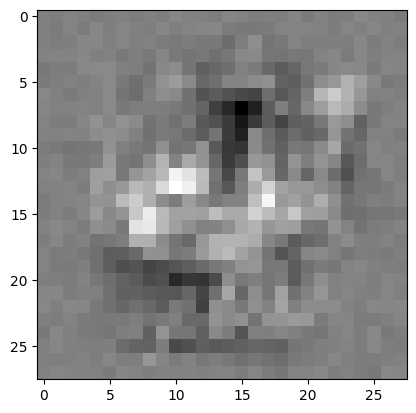

Época:  1 / 100  -- Loss: 0.07412996888160706  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


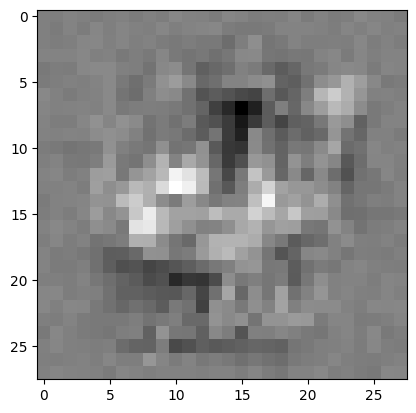

Época:  2 / 100  -- Loss: 0.07401487976312637  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


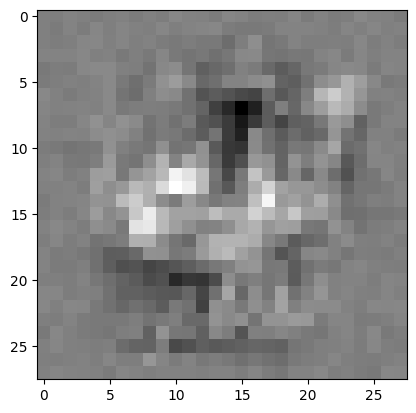

Época:  3 / 100  -- Loss: 0.07390014827251434  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


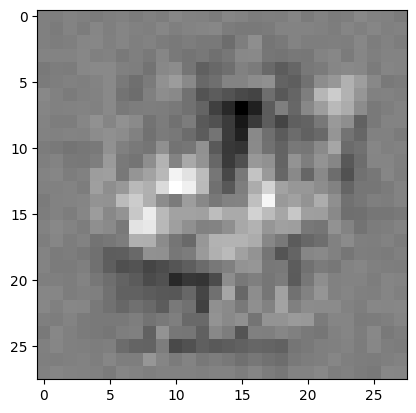

Época:  4 / 100  -- Loss: 0.07378572970628738  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


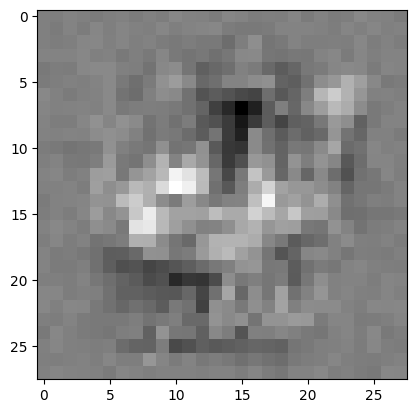

Época:  5 / 100  -- Loss: 0.07367166131734848  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


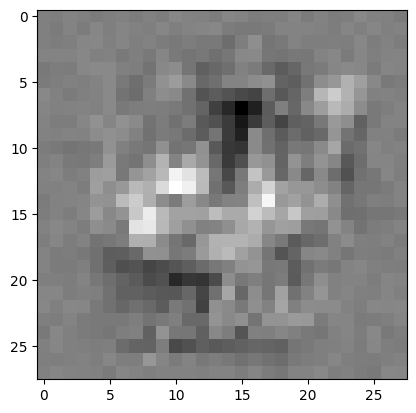

Época:  6 / 100  -- Loss: 0.07355792075395584  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


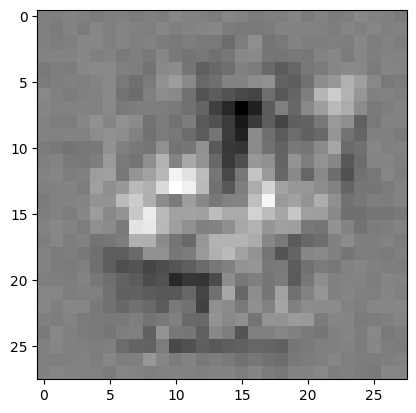

Época:  7 / 100  -- Loss: 0.07344449311494827  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


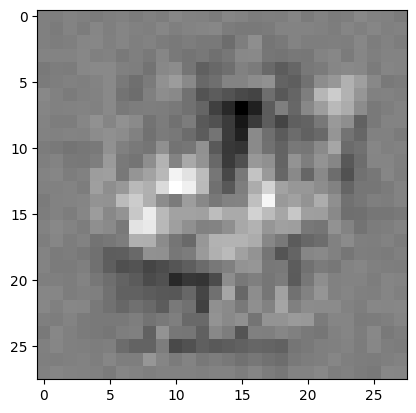

Época:  8 / 100  -- Loss: 0.07333141565322876  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


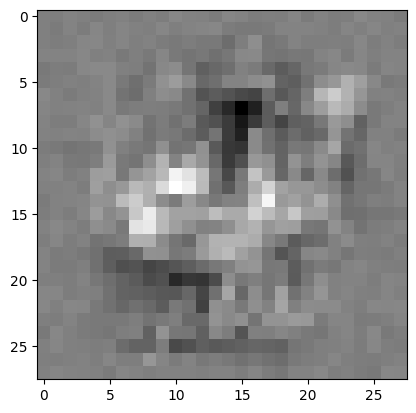

Época:  9 / 100  -- Loss: 0.07321865111589432  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


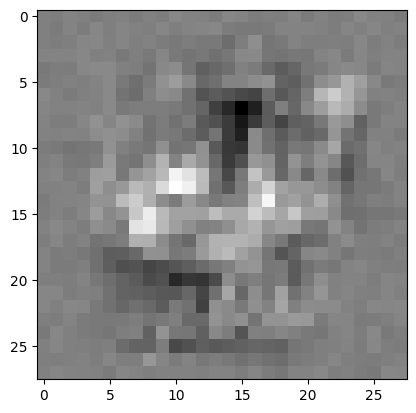

Época:  10 / 100  -- Loss: 0.07310622930526733  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


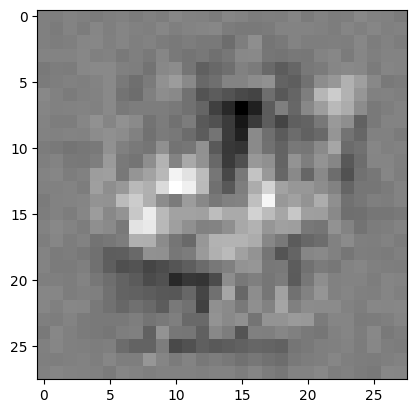

Época:  11 / 100  -- Loss: 0.07299413532018661  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


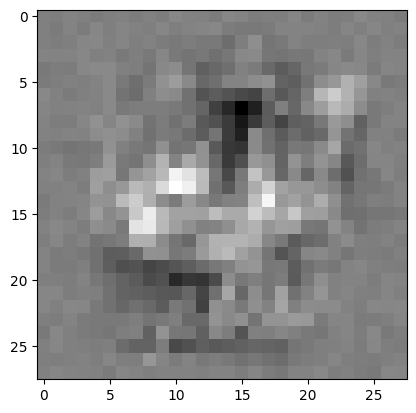

Época:  12 / 100  -- Loss: 0.07288235425949097  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


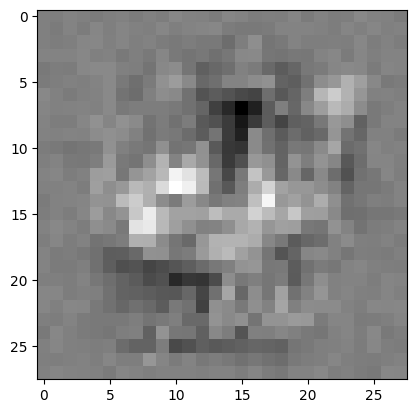

Época:  13 / 100  -- Loss: 0.07277088612318039  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


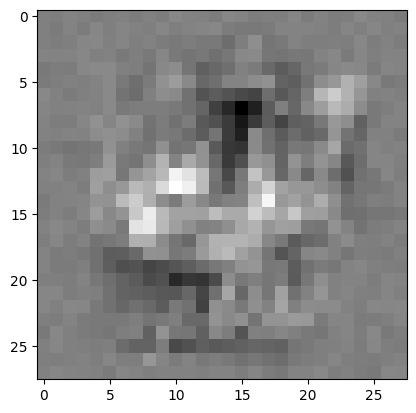

Época:  14 / 100  -- Loss: 0.07265976816415787  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


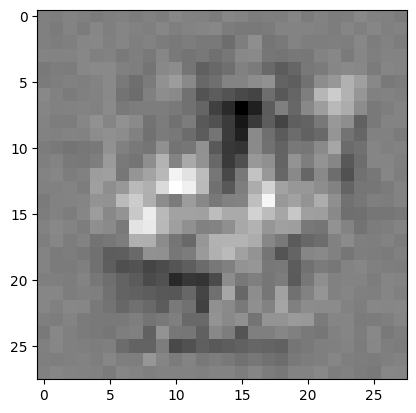

Época:  15 / 100  -- Loss: 0.07254895567893982  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


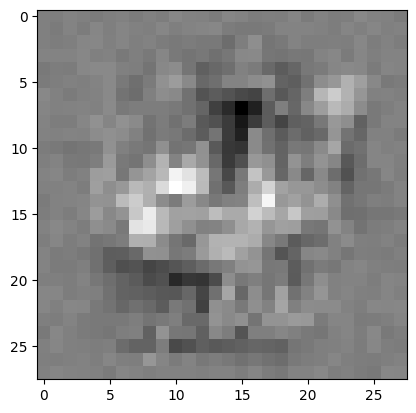

Época:  16 / 100  -- Loss: 0.07243845611810684  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


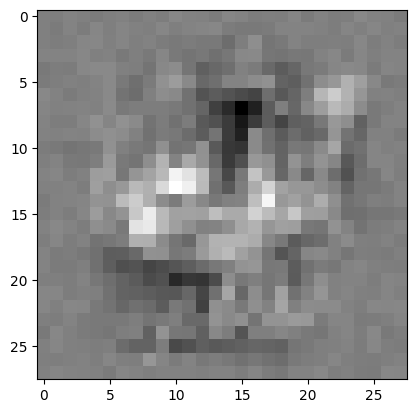

Época:  17 / 100  -- Loss: 0.07232828438282013  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


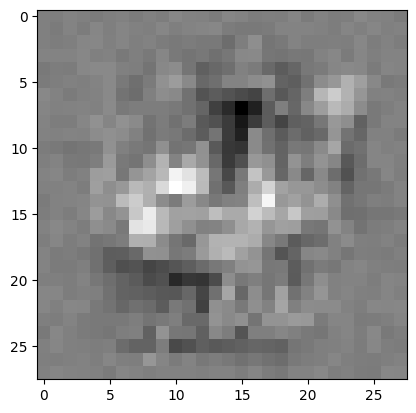

Época:  18 / 100  -- Loss: 0.0722184106707573  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


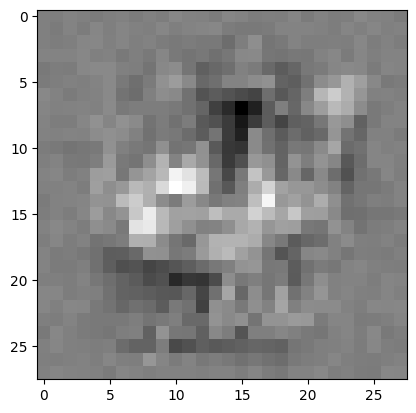

Época:  19 / 100  -- Loss: 0.07210887968540192  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


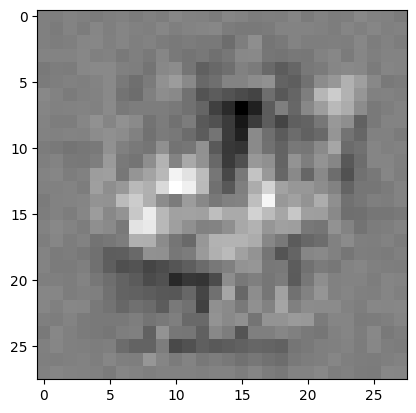

Época:  20 / 100  -- Loss: 0.07199964672327042  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


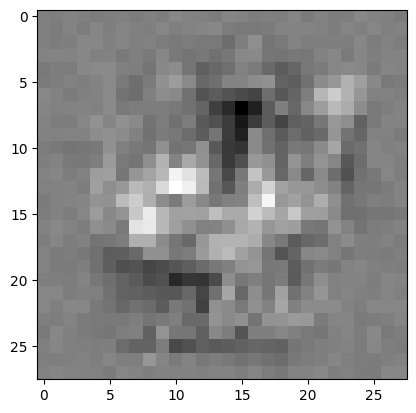

Época:  21 / 100  -- Loss: 0.07189072668552399  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


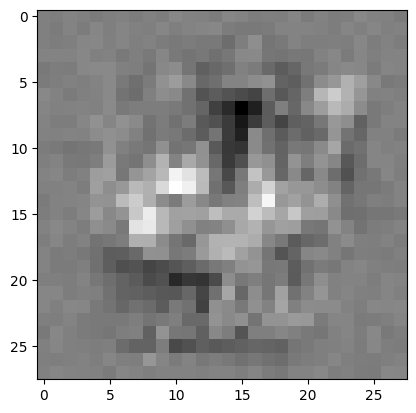

Época:  22 / 100  -- Loss: 0.07178211212158203  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


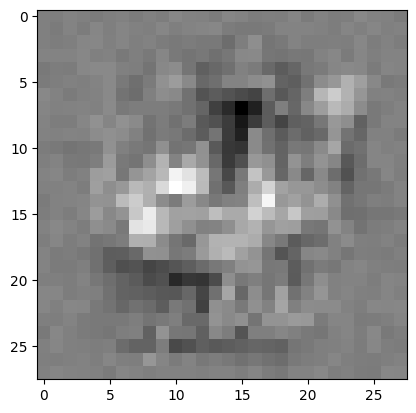

Época:  23 / 100  -- Loss: 0.07167382538318634  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


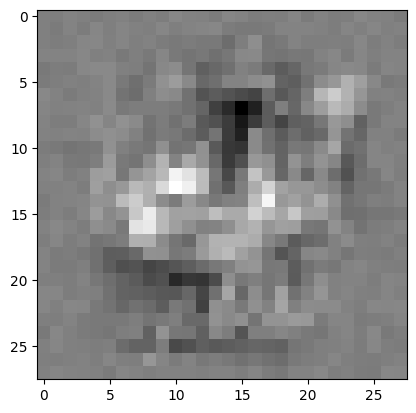

Época:  24 / 100  -- Loss: 0.07156585156917572  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


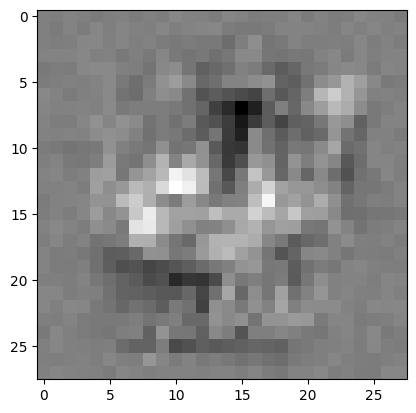

Época:  25 / 100  -- Loss: 0.07145816832780838  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


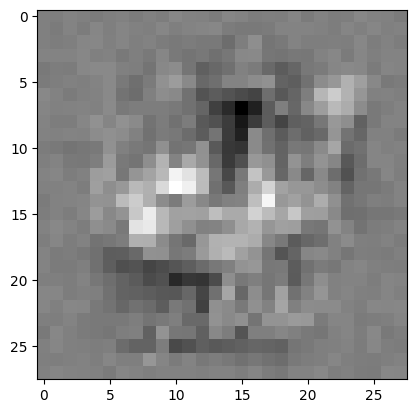

Época:  26 / 100  -- Loss: 0.07135078310966492  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


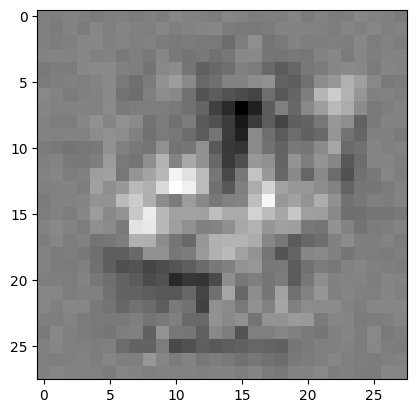

Época:  27 / 100  -- Loss: 0.07124371826648712  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


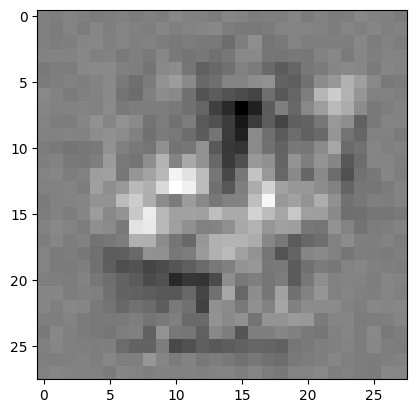

Época:  28 / 100  -- Loss: 0.0711369663476944  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


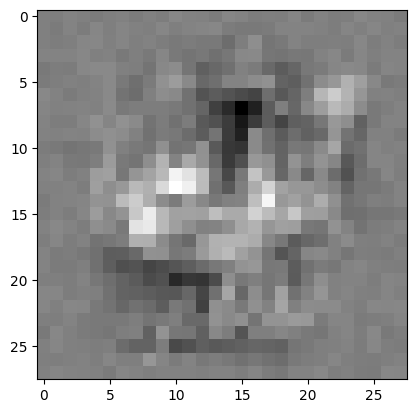

Época:  29 / 100  -- Loss: 0.07103049755096436  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


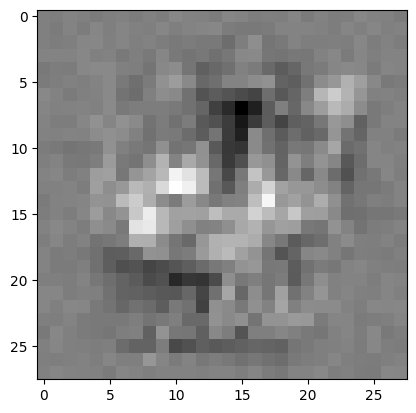

Época:  30 / 100  -- Loss: 0.07092434167861938  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


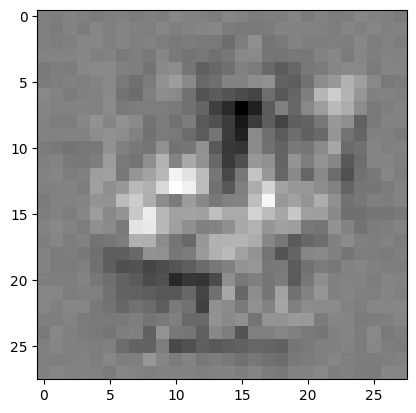

Época:  31 / 100  -- Loss: 0.07081848382949829  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


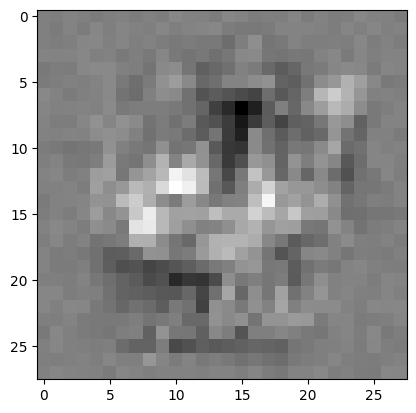

Época:  32 / 100  -- Loss: 0.07071291655302048  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


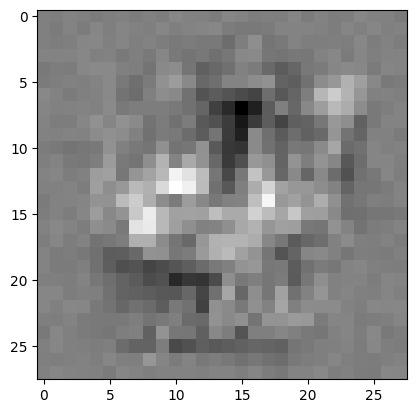

Época:  33 / 100  -- Loss: 0.07060765475034714  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


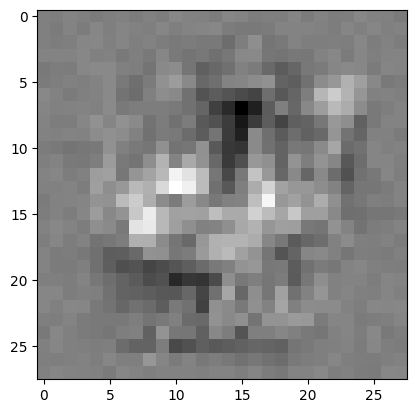

Época:  34 / 100  -- Loss: 0.07050269097089767  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


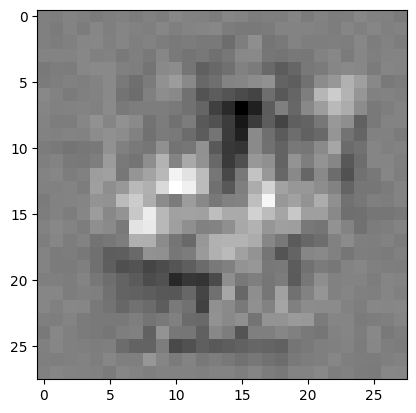

Época:  35 / 100  -- Loss: 0.07039803266525269  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


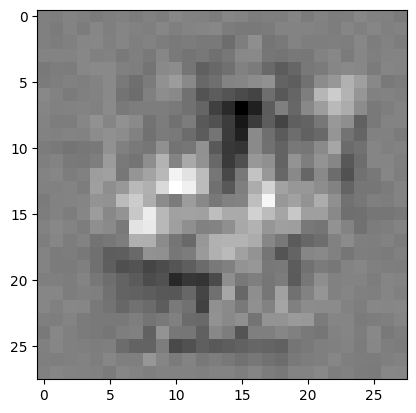

Época:  36 / 100  -- Loss: 0.07029365748167038  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


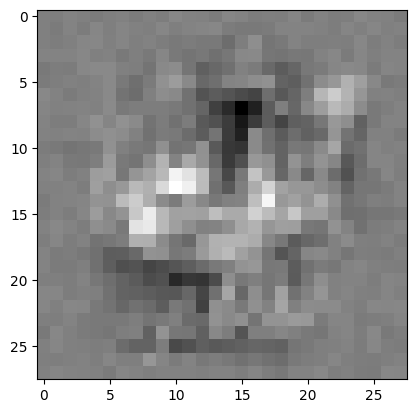

Época:  37 / 100  -- Loss: 0.07018957287073135  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


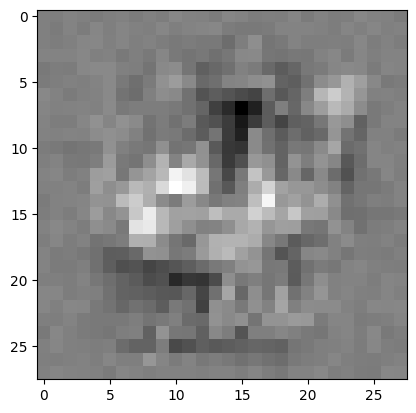

Época:  38 / 100  -- Loss: 0.0700857862830162  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


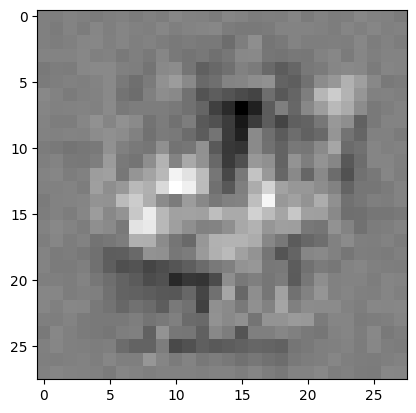

Época:  39 / 100  -- Loss: 0.06998229026794434  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


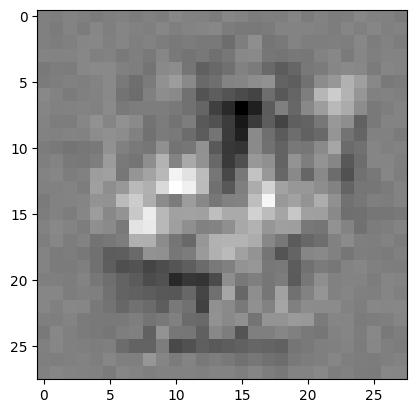

Época:  40 / 100  -- Loss: 0.06987909227609634  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


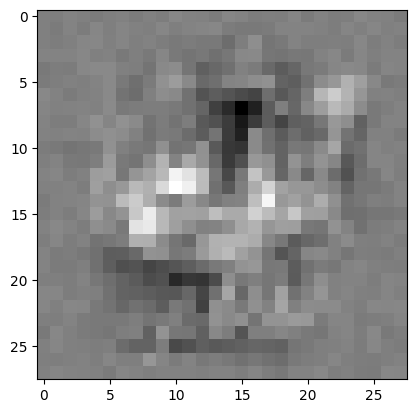

Época:  41 / 100  -- Loss: 0.06977616250514984  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


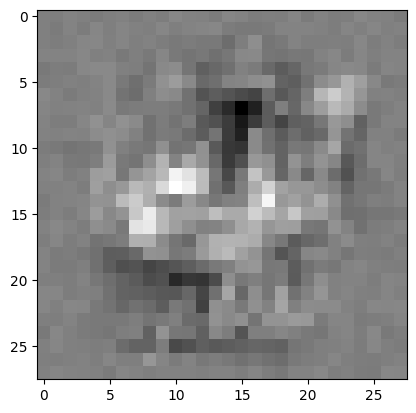

Época:  42 / 100  -- Loss: 0.06967353075742722  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


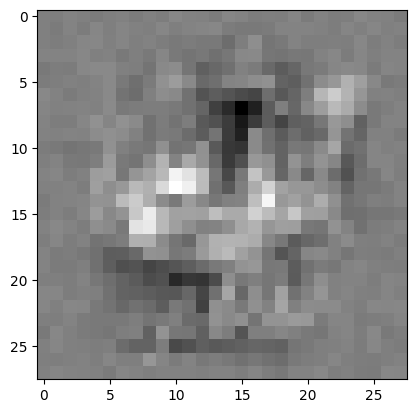

Época:  43 / 100  -- Loss: 0.06957119703292847  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


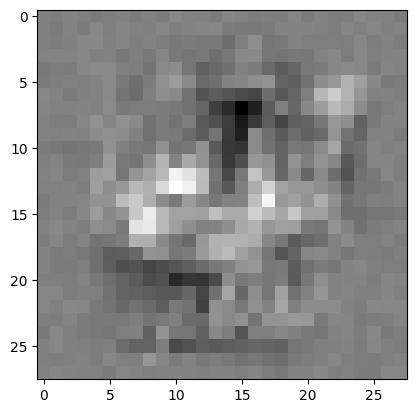

Época:  44 / 100  -- Loss: 0.0694691389799118  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


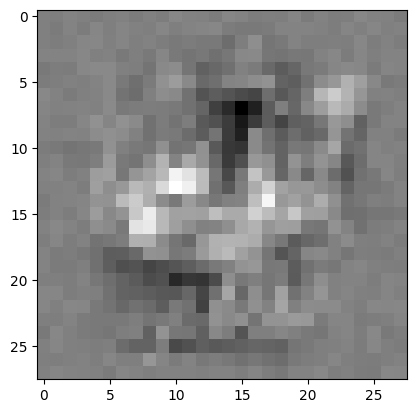

Época:  45 / 100  -- Loss: 0.06936734914779663  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


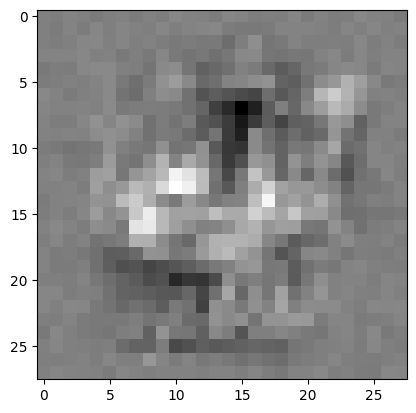

Época:  46 / 100  -- Loss: 0.06926586478948593  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


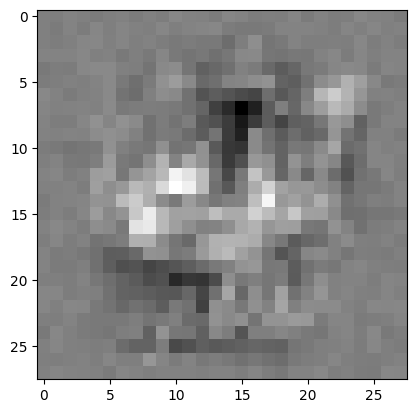

Época:  47 / 100  -- Loss: 0.06916465610265732  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


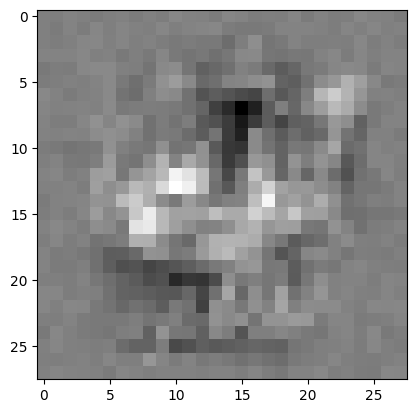

Época:  48 / 100  -- Loss: 0.06906372308731079  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


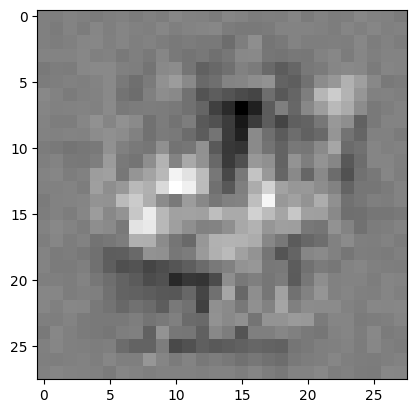

Época:  49 / 100  -- Loss: 0.06896307319402695  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


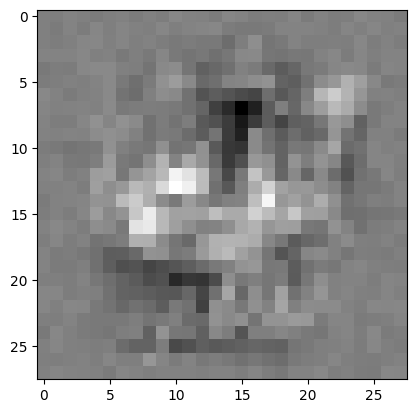

Época:  50 / 100  -- Loss: 0.06886270642280579  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


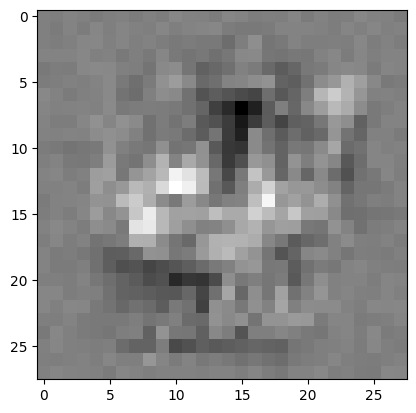

Época:  51 / 100  -- Loss: 0.06876260042190552  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


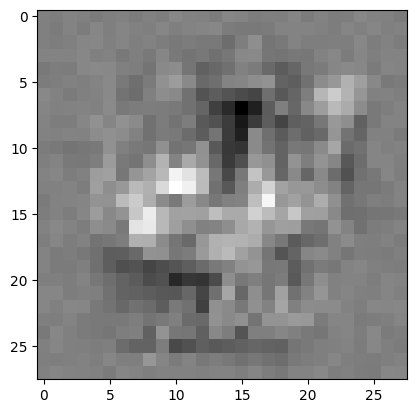

Época:  52 / 100  -- Loss: 0.06866279244422913  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


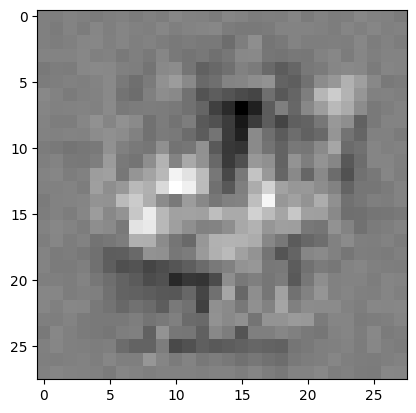

Época:  53 / 100  -- Loss: 0.06856325268745422  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


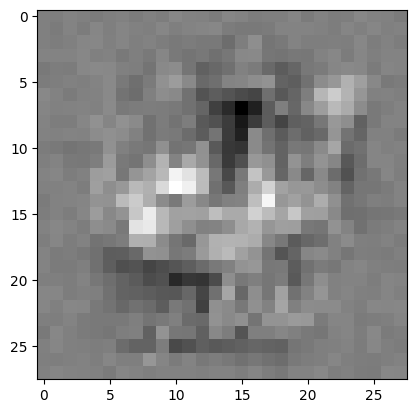

Época:  54 / 100  -- Loss: 0.068463996052742  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


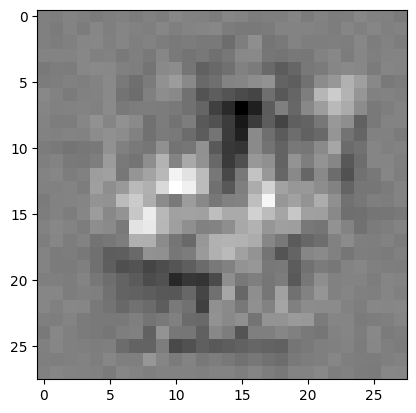

Época:  55 / 100  -- Loss: 0.06836498528718948  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


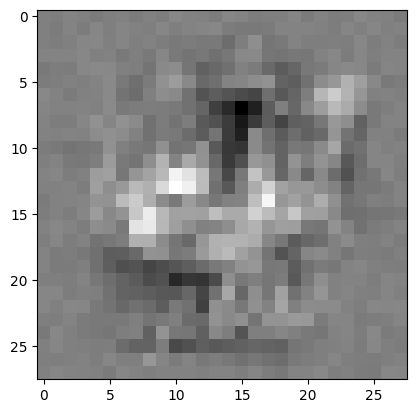

Época:  56 / 100  -- Loss: 0.06826627999544144  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


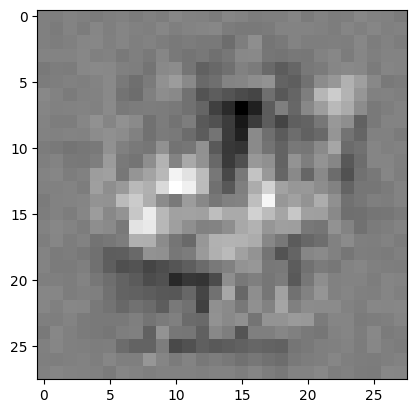

Época:  57 / 100  -- Loss: 0.06816781312227249  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


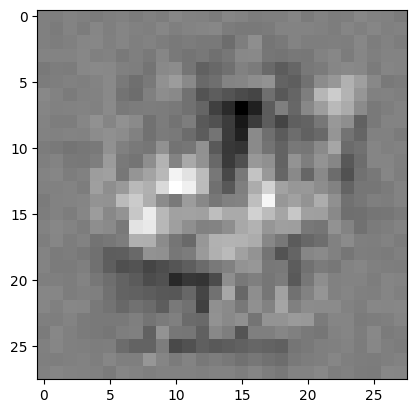

Época:  58 / 100  -- Loss: 0.06806963682174683  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


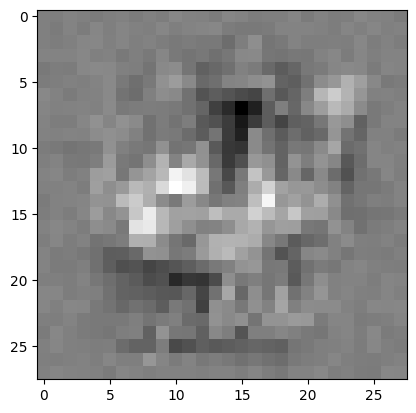

Época:  59 / 100  -- Loss: 0.06797172874212265  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


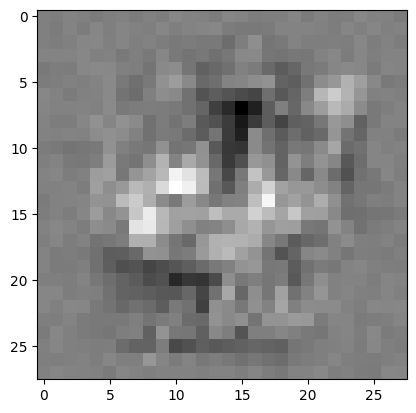

Época:  60 / 100  -- Loss: 0.06787407398223877  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


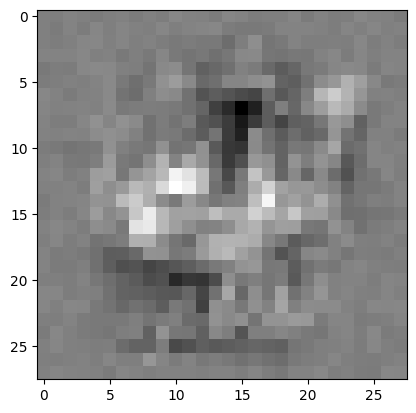

Época:  61 / 100  -- Loss: 0.06777670234441757  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


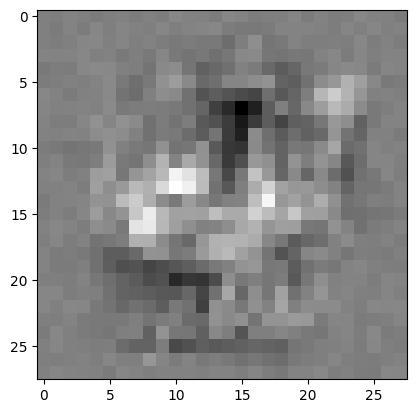

Época:  62 / 100  -- Loss: 0.06767959147691727  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


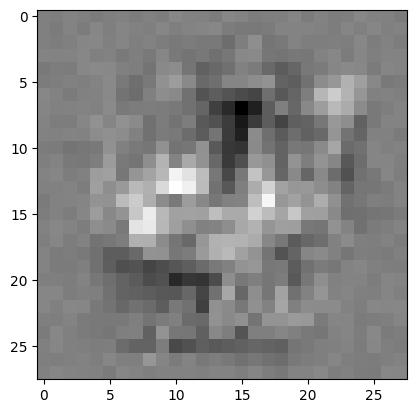

Época:  63 / 100  -- Loss: 0.06758274883031845  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


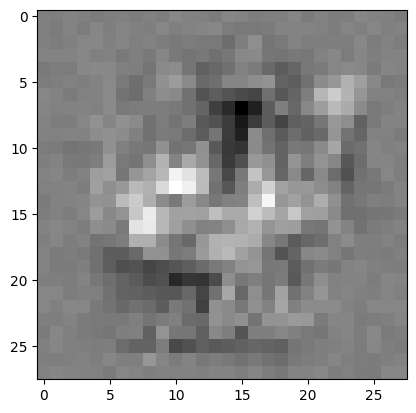

Época:  64 / 100  -- Loss: 0.06748616695404053  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


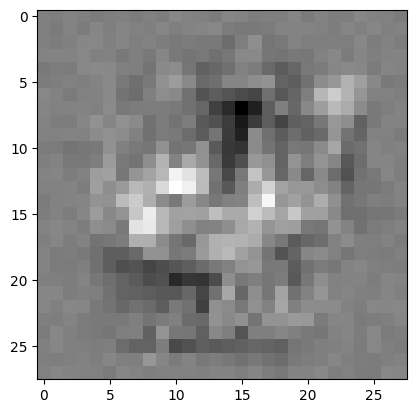

Época:  65 / 100  -- Loss: 0.0673898458480835  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


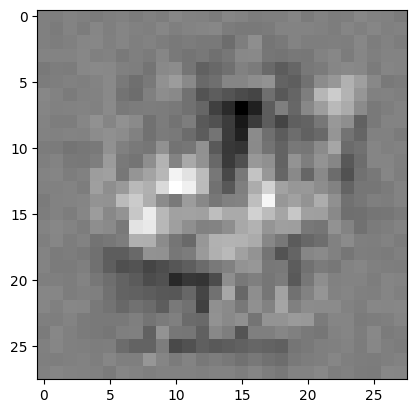

Época:  66 / 100  -- Loss: 0.06729379296302795  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


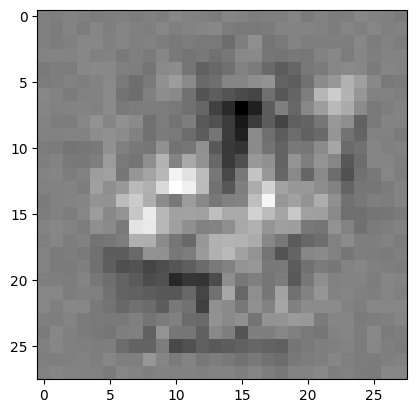

Época:  67 / 100  -- Loss: 0.06719799339771271  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


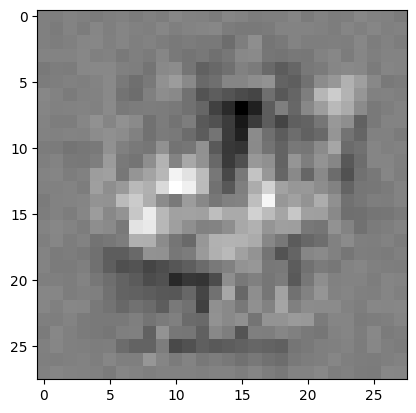

Época:  68 / 100  -- Loss: 0.06710246205329895  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


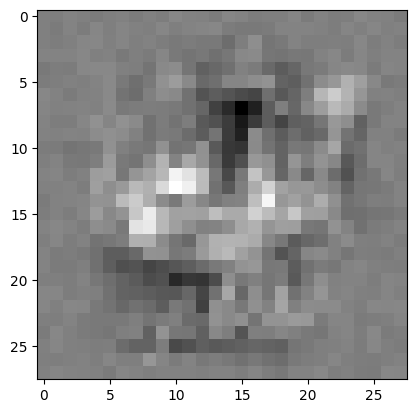

Época:  69 / 100  -- Loss: 0.06700718402862549  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


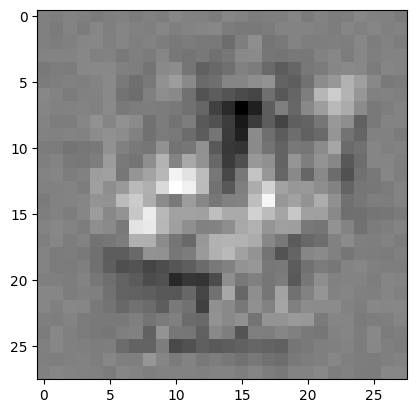

Época:  70 / 100  -- Loss: 0.06691215187311172  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


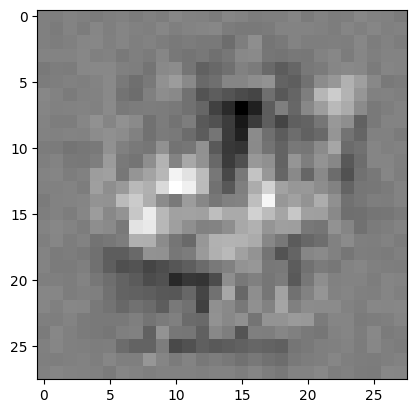

Época:  71 / 100  -- Loss: 0.06681738793849945  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


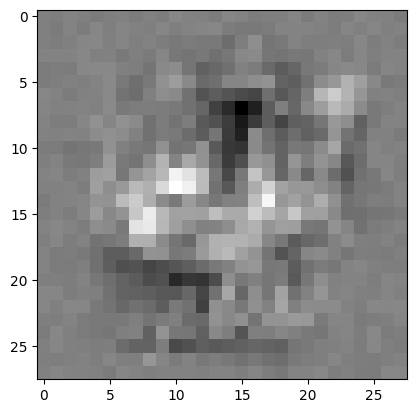

Época:  72 / 100  -- Loss: 0.06672288477420807  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


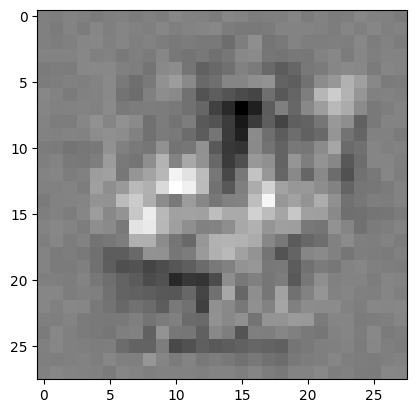

Época:  73 / 100  -- Loss: 0.06662862747907639  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


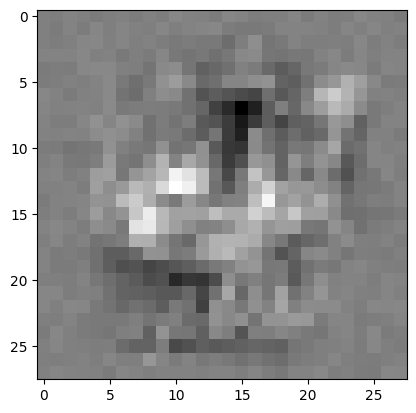

Época:  74 / 100  -- Loss: 0.06653463840484619  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


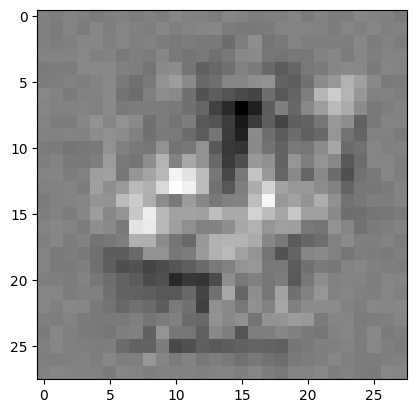

Época:  75 / 100  -- Loss: 0.0664408802986145  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


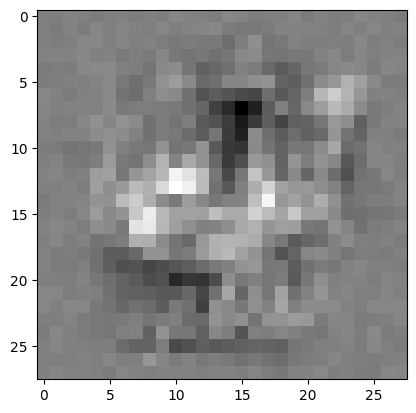

Época:  76 / 100  -- Loss: 0.06634737551212311  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


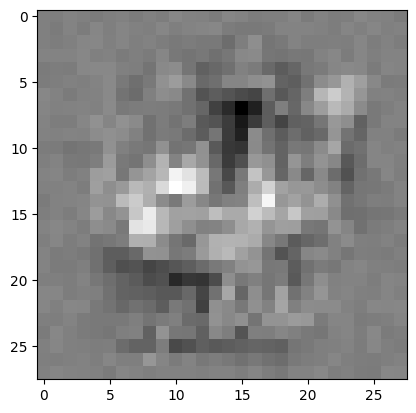

Época:  77 / 100  -- Loss: 0.0662541463971138  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


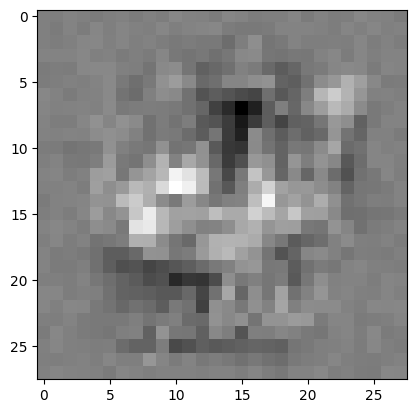

Época:  78 / 100  -- Loss: 0.0661611407995224  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


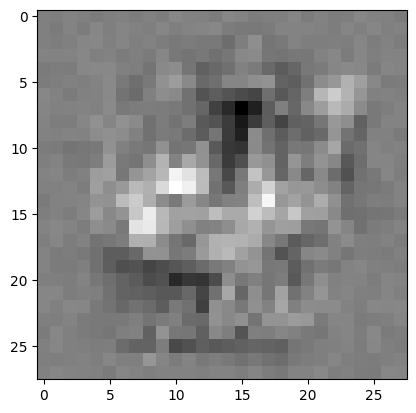

Época:  79 / 100  -- Loss: 0.06606839597225189  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


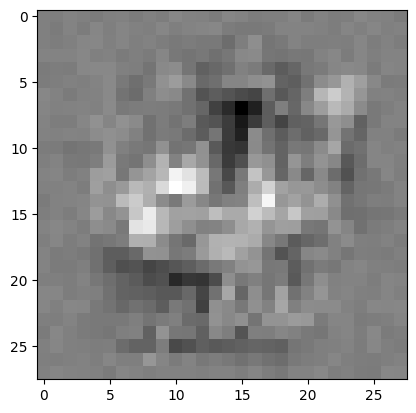

Época:  80 / 100  -- Loss: 0.06597588956356049  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


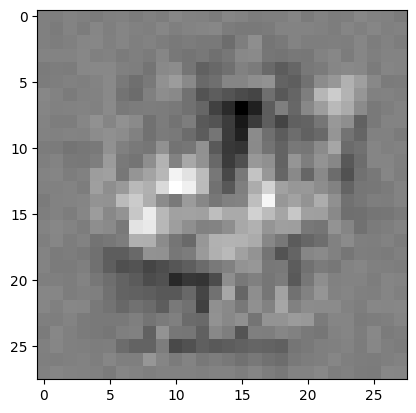

Época:  81 / 100  -- Loss: 0.06588364392518997  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


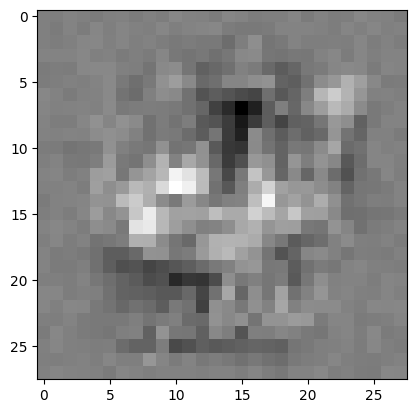

Época:  82 / 100  -- Loss: 0.06579164415597916  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


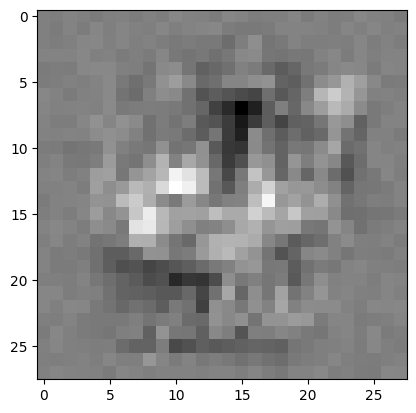

Época:  83 / 100  -- Loss: 0.06569987535476685  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


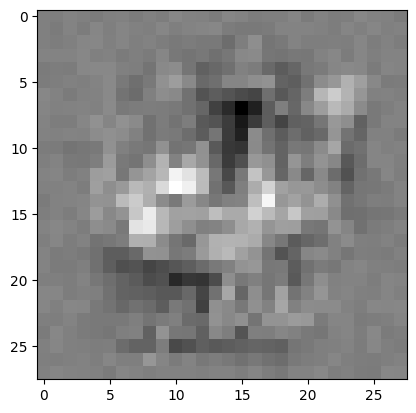

Época:  84 / 100  -- Loss: 0.06560837477445602  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


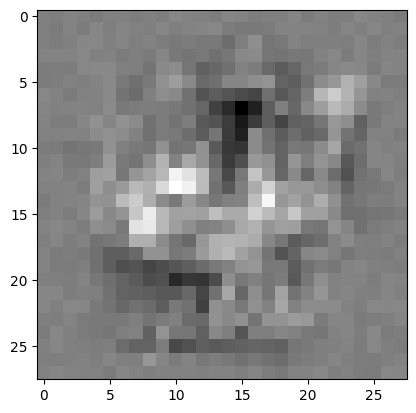

Época:  85 / 100  -- Loss: 0.06551709771156311  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


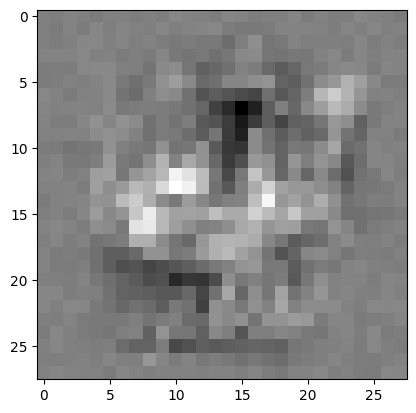

Época:  86 / 100  -- Loss: 0.0654260665178299  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


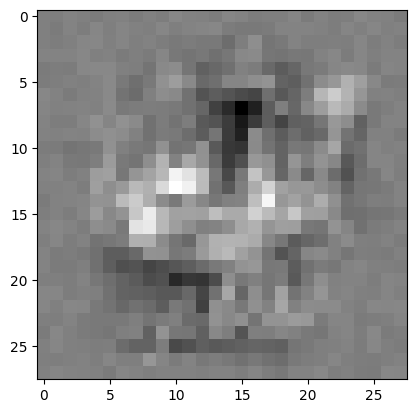

Época:  87 / 100  -- Loss: 0.06533528119325638  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


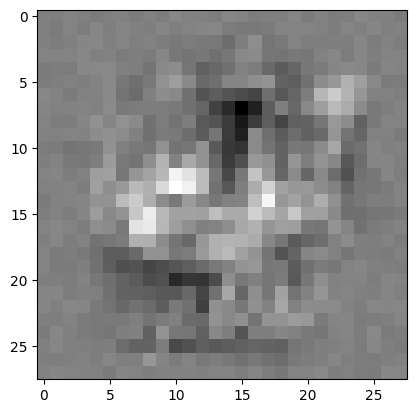

Época:  88 / 100  -- Loss: 0.06524473428726196  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


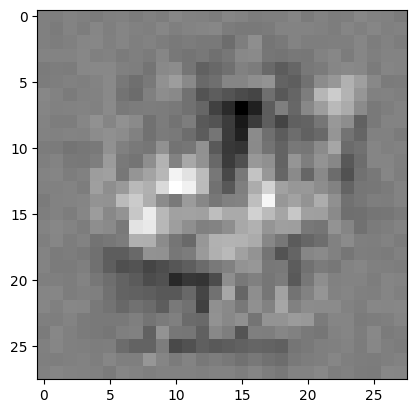

Época:  89 / 100  -- Loss: 0.06515441834926605  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


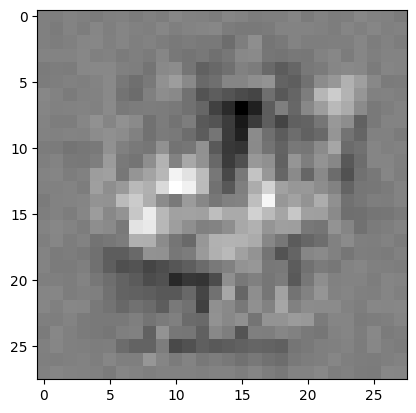

Época:  90 / 100  -- Loss: 0.06506434828042984  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


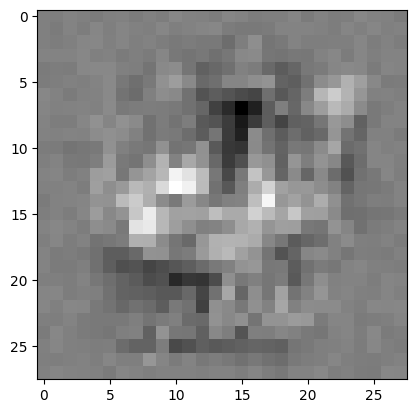

Época:  91 / 100  -- Loss: 0.06497451663017273  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


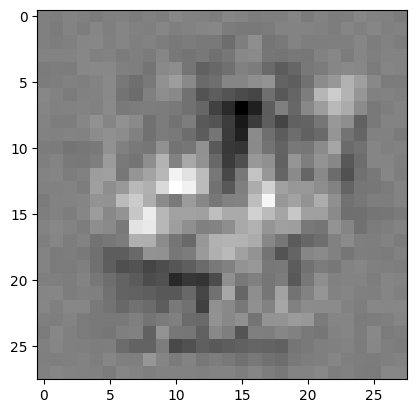

Época:  92 / 100  -- Loss: 0.06488491594791412  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


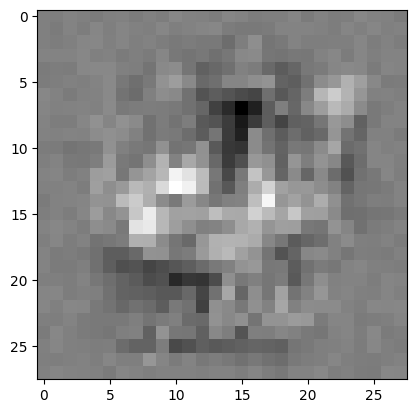

Época:  93 / 100  -- Loss: 0.06479556113481522  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


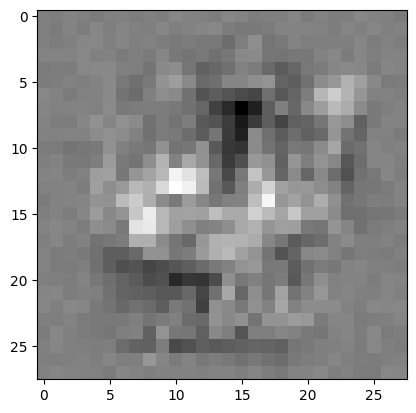

Época:  94 / 100  -- Loss: 0.06470644474029541  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


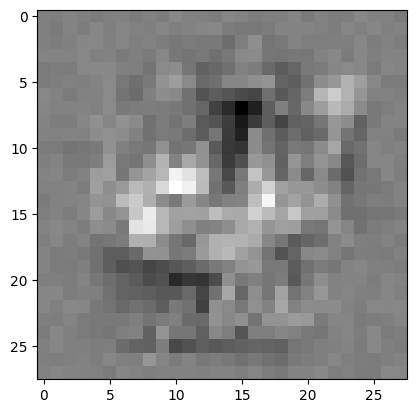

Época:  95 / 100  -- Loss: 0.06461753696203232  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


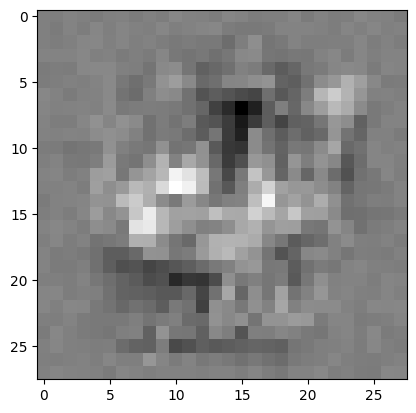

Época:  96 / 100  -- Loss: 0.06452888995409012  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


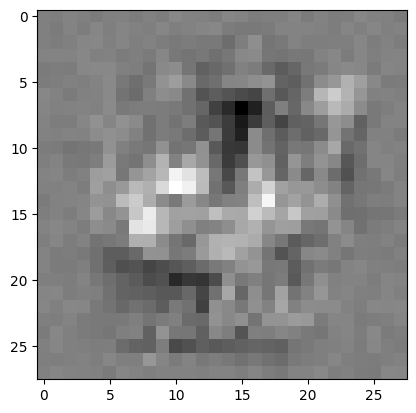

Época:  97 / 100  -- Loss: 0.06444046646356583  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


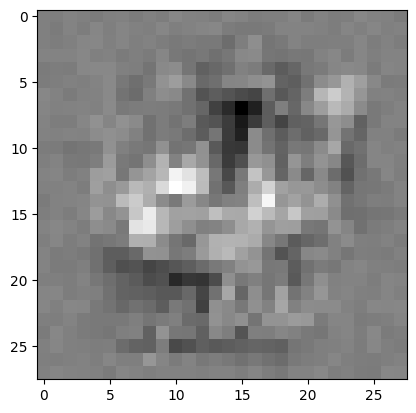

Época:  98 / 100  -- Loss: 0.06435227394104004  -- Acurácia: 0.998
weights: torch.Size([10, 784])
bias:    torch.Size([10])


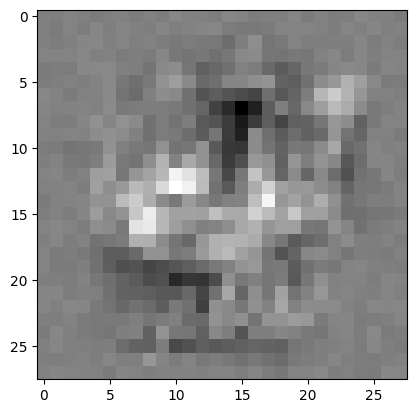

Época:  99 / 100  -- Loss: 0.06426431238651276  -- Acurácia: 0.999
weights: torch.Size([10, 784])
bias:    torch.Size([10])


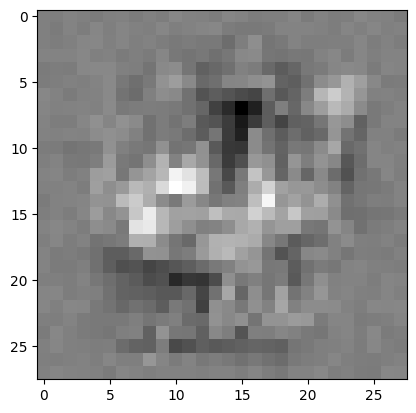

In [29]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época: ',i,'/',epochs,' -- Loss:',loss.item(),' -- Acurácia:',accuracy)

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
  R. (1000.28,28)
2. Qual é o shape da saída da rede?
  R. (1000,10)
3. Qual é o número total de parâmetros da rede, incluindo o bias?
  R. 7850

# Aprendizados
